# Lab of data analysis with python

In this lab we will introduce some of the modules that we will use in the rest of the labs of the course.

The usual beginning of any python module is a list of import statements. In most our files we will use the following modules:

* numpy: The basic scientific computing library.
* csv: Used for input/output using comma separated values files, one of the standards formats in data management.
* matplotlib: Used for plotting figures and graphs.
* sklearn: Scikit-learn is the machine learning library for python. 

In [1]:
%matplotlib inline
# Needed to include the figures in this notebook, you can remove it is you work with a normal script
    
import numpy as np
import csv
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

## 1. NUMPY 

The _numpy_ module is useful for scientific computing in Python.

The main data structure in _numpy_ is the n-dimensional array. You can define a _numpy_ _array_ from a list or a list or lists. Python will try to build it with the appropiate dimensions. You can check the dimensions of the array with _shape()_

In [2]:
my_array = np.array([[1, 2],[3, 4]])
print my_array
print np.shape(my_array)

[[1 2]
 [3 4]]
(2, 2)


Define a new 3x2 array named *my_array2* with  [1, 2, 3] in the first row and [4,5,6] in the second.
Check the dimensions of the array.

There are a number of operations you can do with numpy arrays similars to the ones you can do with matrixes in Matlab. One os the most important is **slicing**. We saw it when we talked about lists, it consists in extracting some subarray of the array.

In [3]:
my_array3 = my_array[:,1]
print my_array3
print my_array[1,0:2]

[2 4]
[3 4]


One important thing to consider when you do slicing are the dimensions of the output array. Check the shape of *my_array3*. Check also its dimension with _ndim_ function: 

If you have correctly computed it you will see that *my_array3* is one dimensional. Sometimes this can be a problem when you are working with 2D matrixes (and vectors can be considered as 2D matrixes with one of the sizes equal to 1). To solve this, _numpy_ provides the _newaxis_ constant.

In [4]:
my_array3 = my_array3[:,np.newaxis]

Check again the shape and dimension of *my_array3*

Another important array manipulation method is array _concatenation_ or _stacking_. It is useful to always state explicitly in which direction we want to stack the arrays. For example in the following example we are stacking the arrays vertically.

In [6]:
print np.concatenate( (my_array, my_array2) , axis=1) # columnwise concatenation

NameError: name 'my_array2' is not defined

Concatenate the first column of *my_array* and the second column of *my_array2*

You can create _numpy_ arrays in several ways, not only from lists. For example _numpy_ provides a number of functions to create special types of matrices. 

Create 3 arrays usings _ones_, _zeros_ and _eye_. If you have any doubt about the parameters of the functions have a look at the help with the function _help( )_.

Finally _numpy_ provides all the basic matrix operations: multiplications, dot products, ...
You can find information about them in the [Numpy manual](http://docs.scipy.org/doc/numpy/reference/) 

In addition to _numpy_ we have a more advanced library for scientific computing, _scipy_. [Scipy](http://www.scipy.org/scipylib/index.html) includes modules for linear algebra, signal processing, fourier transform, ...

## 2. Matplotlib

One important step of data analysis is data visualization. In python the simplest plotting library is _matplotlib_ and its sintax is similar to Matlab plotting library. In the next example we plot two sinusoids with different simbols.

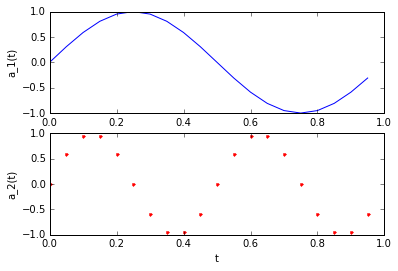

In [7]:
t = np.arange(0.0, 1.0, 0.05)
a1 = np.sin(2*np.pi*t)
a2 = np.sin(4*np.pi*t)


plt.figure()
ax1 = plt.subplot(211)
ax1.plot(t,a1)
plt.xlabel('t')
plt.ylabel('a_1(t)')
ax2 = plt.subplot(212)
ax2.plot(t,a2, 'r.')
plt.xlabel('t')
plt.ylabel('a_2(t)')
plt.show()

## 3. Classification example


One of the main machine learning problems is clasification. In the following example we will load and visualize a dataset that can be used in a clasification problem.

The [iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) is the most popular pattern recognition dataset. And it consists on 150 instances of 4 features of iris flowers:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

The objective is usually to distinguish three different classes of iris plant: Iris setosa, Iris versicolor and Iris virginica.

### 3.1 Loading the data

We give you the data in _.csv_ format. In each line of the csv file we have the 4 real-valued features of each instance and then a string defining the class of that instance: Iris-setosa, Iris-versicolor or Iris-virginica. There are 150 instances of flowers (lines) in the csv file. 

Let's se how we can load the data in an _array_.

In [8]:
# Open up the csv file in to a Python object
csv_file_object = csv.reader(open('iris_data.csv', 'rb')) 
datalist = []                    # Create a variable called 'data'.
for row in csv_file_object:      # Run through each row in the csv file,

    datalist.append(row)         # adding each row to the data variable


data = np.array(datalist)  # Then convert from a list to an array
                           # Be aware that each item is currently
                           # a string in this format
print np.shape(data)
X = data[:,0:-1]
label = data[:,-1,np.newaxis]
print X.shape
print label.shape

(150, 5)
(150, 4)
(150, 1)


In the previous code we have saved the features in matrix _X_ and the class labels in the vector _labels_. Both are 2D _numpy_ _arrays_.
We are also printing the shapes of each variable (see that we can also use *array_name.shape* to get the shape, apart from function _shape( )_). This shape checking is good to see if we are not making mistakes.

### 3.2 Visualizing the data

Extract the first two features of the data (sepal length and width) and plot the first versus the second in a figure, use a different color for the data corresponding to different classes.

First of all you probably want to split the data according to each class label.

According to this plot, which classes seem more difficult to distinguish?  


## 4. Regression example


Now that we know how to load some data and visualize it we will try to solve a simple regression task.

Our objective in this example is to predict the crime rates in different areas of the US using some socio-demographic data.

This dataset has 127 socioeconomic variables, of different nature: categorical, integer, real, and for some of them there are also missing data ([check wikipedia](https://en.wikipedia.org/wiki/Missing_data)). This is usually a problem when training machine learning models, but we will ignore that problem and take only a small number of variables that we think can be useful for regression and which have no missing values.

* population: population for community
* householdsize: mean people per household
* medIncome: median household income 

The objective in the regresion problem is another real value that contains the *total number of violent crimes per 100K population*.

### 4.1 Loading the data

First of all, load the data from file _communities.csv_ in a new array. This array should have 1994 rows (instances) and 128 columns.



Take the columns (5,6,17) of the data and save them in a matrix *X_com*. This will be our input data. Convert this array into a _float_ array. The shape should be (1994,3) 

Get the last column of the data and save it in an array called *y_com*. Convert this matrix into a _float_ array.
Check that the shape is (1994,1) .

Plot each variable in *X_com* versus *y_com* to have a first (partial) view of the data.

### 4.3 Train/Test splitting

Now we are about to start doing machine learning. But, first of all, we have to separate our data between train and test.

The train data will be used to adjust the parameters of our model  (train).
The test data will be used to evaluate our model.

Use *sklearn.cross_validation.train_test_split* to split the data in *train* (60%) and *test* (40%). Save the results in variables named *X_train*, *X_test*, *y_train*, *y_test*.

### 4.4  Normalization

Most machine learning algorithms require that the data is standarized (mean=0, standard deviation= 1). Scikit-learn provides a tool to do that in the object _sklearn.preprocessing.StandardScaler_ (but you can also try and program it by yourself, it easier than in MATLAB!!)

### 4.5 Training

We will two different K-NN regressors for this example. One with K (*n_neighbors*) = 1 and the other with K=7.

Read the [API](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) and [this example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#example-neighbors-plot-regression-py) to understand how to fit the model.

### 4.6 Prediction and evaluation

Now use the two models you have trained to predict the test output *y_test*. Then evaluate it measuring the Mean-Square Error (MSE).

The formula of MSE is

$$\text{MSE}=\frac{1}{K}\sum_{k=1}^{K}(\hat{y}-y)^2$$

### 4.7 Saving the results

Finally we will save all our prediction for the model with K=1 in a csv file. To do so you can use the following code Snippet, where *y_pred* are the predicted output values for test.

In [41]:
y_pred = y_pred.squeeze()
csv_file_object = csv.writer(open('output.csv', 'wb')) 
for index, y_aux in enumerate(y_pred):      # Run through each row in the csv file,
    csv_file_object.writerow([index,y_aux]) 